# Ch3 Linear Regresion - Lab

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

dir='/Users/shuya/Documents/Statistical Learning/Data/'

import warnings
warnings.filterwarnings("ignore")

## Applied Homework

## Question 8

**(a)** perform a simple linear regression with
mpg as the response and horsepower as the predictor. print the results. Comment on the output.
For example:

i. Is there a relationship between the predictor and the response?
>Yes

ii. How strong is the relationship between the predictor and
the response?

>From the summary command for this fit we see that
we have R2 = 0.6059 which says that 60% of the variance has been explained using
this predictor.


iii. Is the relationship between the predictor and the response
positive or negative?

>negative

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?


>the lower bound is 14.85%, the upper bound is 34.08%


In [4]:
auto=pd.read_csv(dir+'Auto.csv').drop(['Unnamed: 0','name'],axis=1)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [119]:
lr=smf.ols('mpg~horsepower',data=auto).fit()
print("residual standard error: {0:.1f}".format(np.sqrt(lr.scale))) # this is the residual standard error (stand deviation of residual)
lr.summary()

residual standard error: 4.9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 06 Aug 2019   Prob (F-statistic):           7.03e-81
Time:                        22:44:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
from scipy.stats import norm
predicted=lr.predict(auto[auto['horsepower']==98]['horsepower']).values[0]
CI_upper=predicted+norm.ppf(0.975)*rse
CI_lower=predicted-norm.ppf(0.975)*rse
print("The lower bound is {0:0.2f}%, the upper bound is {1:.2f}%".format(CI_lower,CI_upper))

The lower bound is 14.85%, the upper bound is 34.08%


**(b)** Plot the response and the predictor. display the least squares regression line.

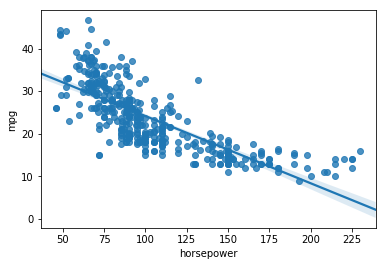

In [81]:
sns.regplot(x='horsepower',y='mpg',data=auto)

**(c)** Produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [97]:
pred=lr.predict(auto['horsepower'])
res=lr.resid

**The first is the residuals of the
model as a function of the fitted values ŷ.** There we see curvature in the scatterplot
suggesting that a non-linear model might be needed. 

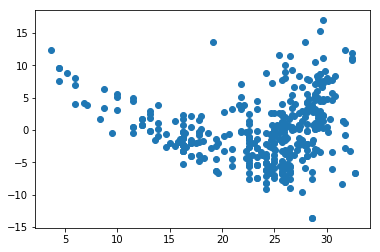

In [105]:
plt.scatter(pred,res)

**The second plot is a qq-plot**
which can be used to determine how well the residual are approximated by a
normal curve. The plot for this data seems reasonable. 

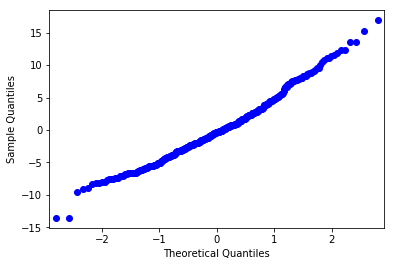

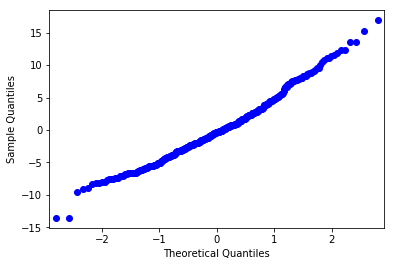

In [100]:
sm.qqplot(res)

**The third plot** the residuals of the
model as a function of the fitted values ŷ can be used to
determine if there is any horsepower dependence to the variance. 

This plot looks
like there may be more variance for larger values of ŷ that we could attempt to
model using weighted least squares. 

We can also use two statistic tests: Breusch-Pagan and Goldfeld-Quandt to check the homoskedacity. 

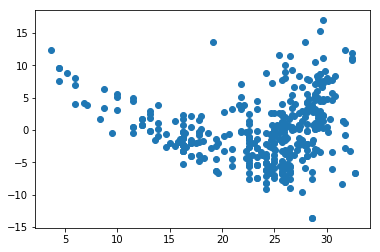

In [106]:
plt.scatter(pred,res)

In [117]:
import statsmodels.stats.api as sms

bp_test = sms.het_breuschpagan(res, lr.model.exog)
gq_test = sms.het_goldfeldquandt(res, lr.model.exog)

print('The p-value for bp test is {0:.5f}, and for gq test is {1:.5f}'.format(bp_test[1],gq_test[1]))

The p-value for bp test is 0.00309, and for gq test is 0.00000


*the assumption of homoskedacity is rejected*

**The fourth** plot expresses which points have
large leverage (have the largest influence on the estimation of the least squares
coefficient estimates). From that plot we see that the samples with indices 117 and
84 seem to have the largest influence on the estimations of β0 and β1.

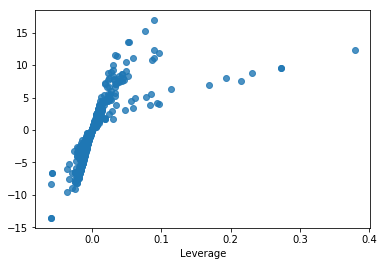

In [104]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(lr).influence, name = "Leverage")
#print(leverage)
sns.regplot(leverage, res, fit_reg=False)

## Question 9
This question involves the use of multiple linear regression on the
Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

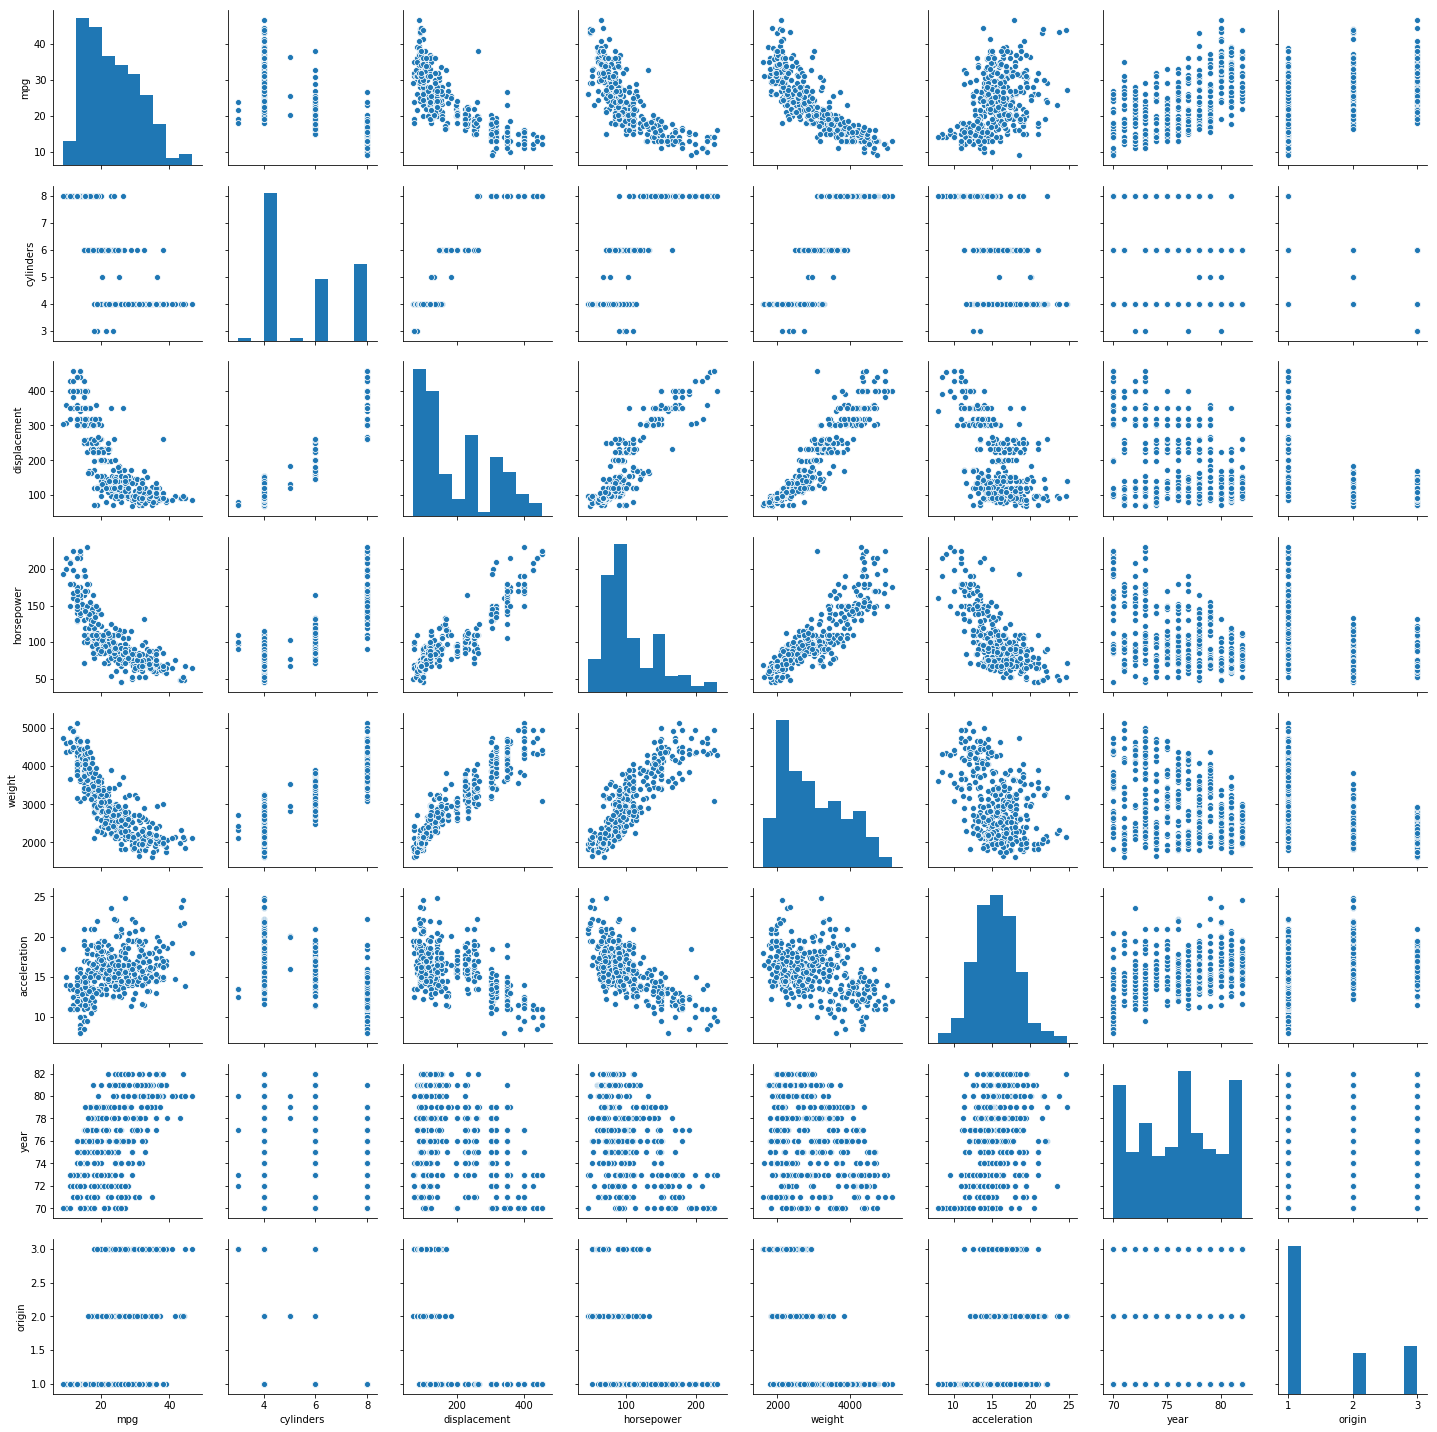

In [24]:
sns.pairplot(auto)

(b) Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable,
cor()
which is qualitative.

In [122]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:
i. Is there a relationship between the predictors and the response?
ii. Which predictors appear to have a statistically significant
relationship to the response?
iii. What does the coefficient for the year variable suggest?

Part (i): 
> We see a large F-value and a very small p-value for the overall model fit. This indicates that there is a relationship between mpg and the other predictors. In addition, the r-square/adj.r-square is high.


Part (ii): 
> From the above summary output,  the predictors with the most significance appear to be weight, displacement, year and origin.


Part (iii): 
> The coefficient of year is positive (with large significance) which indicates that as for larger years we have larger values of mpg. This implies perhaps that car manufactures worked harder as time went by to increase the mpg of the cars they produced.

In [6]:
mlr=smf.ols('mpg ~ cylinders + displacement +horsepower +weight+acceleration+year+origin',data=auto).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          2.04e-139
Time:                        19:12:42   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?


>It appers that 320, 324, 323, 242 has large residuals

110   -9.590261
268   -8.512711
164   -7.841100
153   -7.435027
107   -7.107660
331   -6.979266
361   -6.400706
70    -6.387177
383   -6.358621
273   -6.125289
dtype: float64
320    13.060427
324    11.908136
323    11.350776
242    11.021033
307     9.812243
327     9.641961
381     9.566833
388     9.535428
325     9.394544
322     7.175574
dtype: float64


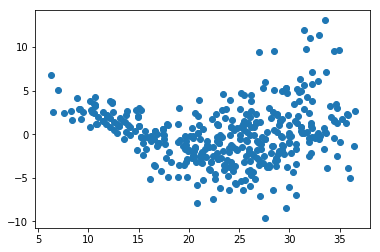

In [28]:
res=mlr.resid
print(res.sort_values()[:10])
print(res.sort_values(ascending=False)[:10])
pred=mlr.predict(auto.drop(['mpg'],axis=1))
#print(pred[110]) 
#print(auto.iloc[110,]['mpg']) #double check the residual
plt.scatter(pred,res)

(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

>Other combinations where the interaction is significant are
acceleration:horsepower and acceleration:weight. Using the anova
function shows that a model with the interaction terms is better (offers a
statistically significant reduction in RSS) than the model without the interaction.
From a pairs plot we would expect displacement, horsepower, weight, and
acceleration to act somewhat the same manner with regard to interactions.

In [53]:
mlr=smf.ols('mpg ~ cylinders + horsepower*weight + displacement +horsepower +weight+acceleration+year+origin',data=auto).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          1.88e-159
Time:                        22:20:16   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8757      4.511      0.638      0.524      -5.993      11.744
cylinders            -0.0296      0.288     -0.103      0.918      -0.596       0.537
horsepower           -0.2313      0.024     -9.791      0.000      -0.278      -0.185
weight               -0.0112      0.001    -15.393      0.000      -0.013      -0.010
horsepower:weight  5.529e-05   5.23e-06     10.577      0.000     4.5e-05    6.56e-05
displacement          0.0059      0.007      0.881      0.379      -0.007       0.019
acceleration         -0.0902      0.089     -1.019      0.309      -0.264       0.084
year                  0.7695      0.045     17.124      0.000       0.681       0.858
origin                0.8344      0.251      3.320      0.001       0.340       1.329
==============================================================================
Omnibus:                       40.936   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.199
Skew:                           0.629   Prob(JB):                     1.27e-16
Kurtosis:                       4.703   Cond. No.                     1.23e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
mlr=smf.ols('mpg ~ cylinders + horsepower*acceleration + displacement +horsepower +weight+acceleration+year+origin',data=auto).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          8.74e-148
Time:                        19:29:59   Log-Likelihood:                -1000.8
No. Observations:                 392   AIC:                             2020.
Df Residuals:                     383   BIC:                             2055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -32.4998      4.923     -6.601      0.000     -42.180     -22.820
cylinders                   0.0835      0.317      0.263      0.792      -0.540       0.707
horsepower                  0.1272      0.025      5.140      0.000       0.079       0.176
acceleration                0.9833      0.162      6.088      0.000       0.666       1.301
horsepower:acceleration    -0.0121      0.002     -6.851      0.000      -0.016      -0.009
displacement               -0.0076      0.008     -0.937      0.349      -0.024       0.008
weight                     -0.0040      0.001     -5.552      0.000      -0.005      -0.003
year                        0.7559      0.048     15.690      0.000       0.661       0.851
origin                      1.0357      0.269      3.851      0.000       0.507       1.565
==============================================================================
Omnibus:                       21.612   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.894
Skew:                           0.382   Prob(JB):                     2.65e-08
Kurtosis:                       4.246   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
mlr=smf.ols('mpg ~ cylinders + horsepower*cylinders + displacement +horsepower +weight+acceleration+year+origin',data=auto).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     299.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.33e-159
Time:                        19:31:25   Log-Likelihood:                -972.89
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.7025      4.912      2.383      0.018       2.046      21.360
cylinders               -4.3061      0.458     -9.400      0.000      -5.207      -3.405
horsepower              -0.3157      0.031    -10.304      0.000      -0.376      -0.255
horsepower:cylinders     0.0402      0.004     10.619      0.000       0.033       0.048
displacement            -0.0014      0.007     -0.201      0.840      -0.015       0.012
weight                  -0.0039      0.001     -6.250      0.000      -0.005      -0.003
acceleration            -0.1703      0.090     -1.889      0.060      -0.348       0.007
year                     0.7393      0.045     16.476      0.000       0.651       0.828
origin                   0.9032      0.250      3.617      0.000       0.412       1.394
==============================================================================
Omnibus:                       42.400   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.790
Skew:                           0.635   Prob(JB):                     7.78e-18
Kurtosis:                       4.792   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(f) Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.

In [40]:
mlr=smf.ols('mpg ~ cylinders + displacement +horsepower+ I(horsepower**2) + weight+acceleration+year+origin',data=auto).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     282.8
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.42e-155
Time:                        19:42:13   Log-Likelihood:                -982.41
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     383   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3237      4.625      0.286      0.775      -7.769      10.417
cylinders              0.3489      0.305      1.145      0.253      -0.250       0.948
displacement          -0.0076      0.007     -1.026      0.306      -0.022       0.007
horsepower            -0.3195      0.034     -9.302      0.000      -0.387      -0.252
I(horsepower ** 2)     0.0010      0.000      9.449      0.000       0.001       0.001
weight                -0.0033      0.001     -4.820      0.000      -0.005      -0.002
acceleration          -0.3306      0.099     -3.333      0.001      -0.526      -0.136
year                   0.7353      0.046     15.989      0.000       0.645       0.826
origin                 1.0144      0.255      3.985      0.000       0.514       1.515
==============================================================================
Omnibus:                       28.137   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.389
Skew:                           0.470   Prob(JB):                     5.12e-11
Kurtosis:                       4.421   Cond. No.                     4.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

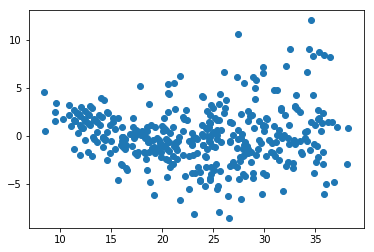

In [41]:
plt.scatter(mlr.predict(auto.drop(['mpg'],axis=1)),mlr.resid)

## Question 10

This question should be answered using the Carseats data set.

>(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.




In [43]:
carseat=pd.read_csv(dir+'Carseats.csv')
carseat.head()
carseat_lr=smf.ols('Sales ~ Price + C(Urban) + C(US)',data=carseat).fit()
carseat_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           2.39e-23
Time:                        19:46:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

This indicates that the coefficient of Price is negative (and significant) showing
that as the price increases sales decrease. The coefficient of UrbanYes is negative
(but not significant). If it was significant we could conclude that an urban
environment has less sales than a rural environment. The coefficient of USYes is
positive indicating that stores in the US have increased sales over ones that are not
located in the US.



>(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

>(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

Price and USYes

>(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [44]:
carseat=pd.read_csv(dir+'Carseats.csv')
carseat.head()
carseat_lr=smf.ols('Sales ~ Price + C(US)',data=carseat).fit()
carseat_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           2.66e-24
Time:                        19:46:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>(f) How well do the models in (a) and (e) fit the data?

The model in Part (a) has R2 = 0.2393 (with = 2.472) and the model in
Part (e) has R2 = 0.2393 (with = 2.469). Thus these two models have the same
value of R2 but the second model has a smaller estimate of error about the linear fit.

>(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s).

In [45]:
parameters=pd.DataFrame(carseat_lr.params)
parameters.columns=['coef']
print(parameters)
carseat_lr.conf_int()

                   coef
Intercept     13.030793
C(US)[T.Yes]   1.199643
Price         -0.054478


,0,1
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


>(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

In [80]:
res=carseat_lr.resid
print(res.sort_values()[:5])
print(res.sort_values(ascending=False)[:5])


50    -6.926851
209   -6.307449
28    -5.956105
57    -5.746910
297   -5.494762
dtype: float64
376    7.051506
68     6.459567
25     6.336373
352    5.855835
49     5.696374
dtype: float64


NameError: name 'lm_stats' is not defined

## Question 11

11. In this problem we will investigate the t-statistic for the null hypothesis
H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

> set.seed(1)

> x=rnorm(100)

> y=2*x+rnorm(100)


In [50]:
x=np.random.randn(100).reshape(-1,1)
y=2*x+np.random.randn(100).reshape(-1,1)
df=pd.DataFrame(np.concatenate((x,y),axis=1),columns=['x','y'])
print(df.head())

'''
There are several possibilities for concatenating 1D arrays, e.g.,

numpy.r_[a, a],
numpy.stack([a, a]).reshape(-1),
numpy.hstack([a, a]),
numpy.concatenate([a, a])
'''

          x         y
0 -0.959132 -2.000707
1 -0.299317  0.821558
2  1.246807  2.972293
3  0.274227  0.203863
4  0.482754  2.634211


'\nThere are several possibilities for concatenating 1D arrays, e.g.,\n\nnumpy.r_[a, a],\nnumpy.stack([a, a]).reshape(-1),\nnumpy.hstack([a, a]),\nnumpy.concatenate([a, a])\n'

(a) Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate ˆβ, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the command lm(y∼x+0).)

In [61]:
slr=sm.OLS(y,x).fit()
print(slr.summary())
print('the coefficient estimate is {0:0.2f}'.format(slr.params[0]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     285.4
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           6.33e-31
Time:                        19:52:58   Log-Likelihood:                -143.59
No. Observations:                 100   AIC:                             289.2
Df Residuals:                      99   BIC:                             291.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9846      0.117     16.895      0.0

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

In [62]:
slr=sm.OLS(x,y).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     285.4
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           6.33e-31
Time:                        19:58:12   Log-Likelihood:                -60.168
No. Observations:                 100   AIC:                             122.3
Df Residuals:                      99   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3741      0.022     16.895      0.0

(c) What is the relationship between the results obtained in (a) and
(b)?

>Notice that the t-stat (16.895) of the coefficient of β1 is the same in both
regressions.

(f) Show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

In [65]:
slr=sm.OLS(y,sm.add_constant(x)).fit()
print(slr.summary())
print('the coefficient estimate is {0:0.2f}'.format(slr.params[0]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     288.4
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           5.89e-31
Time:                        20:01:39   Log-Likelihood:                -142.66
No. Observations:                 100   AIC:                             289.3
Df Residuals:                      98   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1388      0.102      1.364      0.1

In [66]:
slr=sm.OLS(x,sm.add_constant(y)).fit()
print(slr.summary())
print('the coefficient estimate is {0:0.2f}'.format(slr.params[0]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     288.4
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           5.89e-31
Time:                        20:02:10   Log-Likelihood:                -59.392
No. Observations:                 100   AIC:                             122.8
Df Residuals:                      98   BIC:                             128.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0549      0.044     -1.238      0.2

## Question 12

This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate ˆ β for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

(b) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

In [72]:
x=np.random.randn(100)
y=2*x
model_1=sm.OLS(x,y).fit()
model_2=sm.OLS(y,x).fit()
print("the coefficient of model 1 is {0:0.2f},the coefficient of model 2 is {1:0.2f}".format(model_1.params[0],model_2.params[0]))

[0.5]
the coefficient of model 1 is 0.50,the coefficient of model 2 is 2.00


(c) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

In [73]:
x=np.random.randn(100)
y=x
model_1=sm.OLS(x,y).fit()
model_2=sm.OLS(y,x).fit()
print("the coefficient of model 1 is {0:0.2f},the coefficient of model 2 is {1:0.2f}".format(model_1.params[0],model_2.params[0]))

the coefficient of model 1 is 1.00,the coefficient of model 2 is 1.00
